In [32]:
import pandas as pd


In [33]:
data = pd.read_csv('travel.csv')

In [34]:
data

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0   NaN     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
1           Salaried    Male                       3                4.0   
2        Free Lancer    Male                       3                4.0   
3           Salaried  Female                       2                3.0   
4     Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
1            0                       3       1                       2.0   
2            1                       3       0                       0.0   
3            1                       5       1                       1.0   
4            0                       5       1                       0.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Exe

In [35]:
print("A.Age distribution and relation to product purchase:")

A.Age distribution and relation to product purchase:


In [36]:
print(data['Age'].describe())

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64


<Axes: xlabel='Age'>

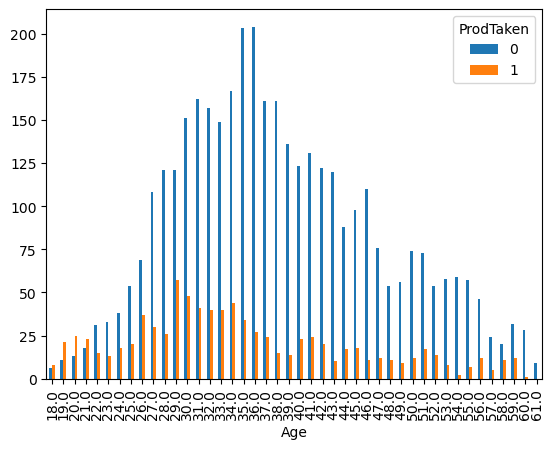

In [37]:
data.groupby(['Age'])['ProdTaken'].value_counts().unstack().plot(kind ='bar')

In [38]:
print(data.groupby(['TypeofContact'])['ProdTaken'].value_counts(normalize=True))  


TypeofContact    ProdTaken
Company Invited  0            0.781536
                 1            0.218464
Self Enquiry     0            0.823751
                 1            0.176249
Name: proportion, dtype: float64


In [39]:
correlation = data[['CityTier', 'MonthlyIncome']].corr()


In [40]:

print(correlation['CityTier']['MonthlyIncome'])  


0.05181691698577297


In [41]:
print(data.groupby(["ProdTaken"])["DurationOfPitch"].mean())

ProdTaken
0    15.169325
1    16.873143
Name: DurationOfPitch, dtype: float64


In [42]:
print(data['Occupation'].value_counts())

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64


In [43]:
print(data.groupby(['Occupation'])['ProdTaken'].mean())

Occupation
Free Lancer       1.000000
Large Business    0.276498
Salaried          0.174831
Small Business    0.184261
Name: ProdTaken, dtype: float64


In [44]:
print(data.groupby(['ProductPitched'])['Gender'].value_counts())

ProductPitched  Gender 
Basic           Male       1162
                Female      676
                Fe Male       4
Deluxe          Male       1008
                Female      641
                Fe Male      83
King            Male        148
                Female       82
Standard        Male        416
                Female      263
                Fe Male      63
Super Deluxe    Male        182
                Female      155
                Fe Male       5
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


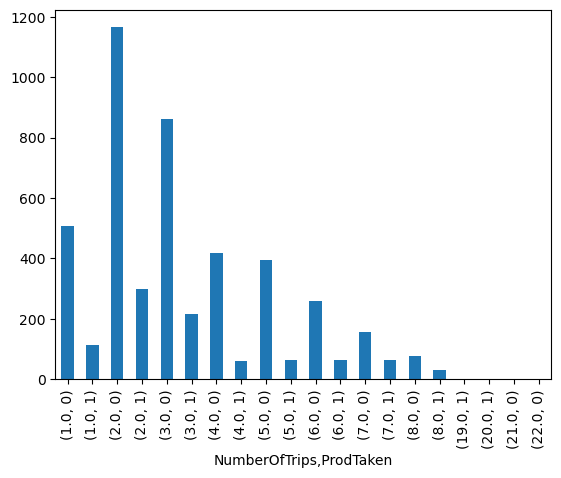

In [45]:
print(data.groupby(['NumberOfTrips'])['ProdTaken'].value_counts().plot(kind= 'bar'))

In [46]:
 corelation = data[['Passport', 'NumberOfTrips']].corr()

In [47]:
print(corelation['Passport']['NumberOfTrips'])  


0.012948643307955051


In [51]:
print(data.groupby(['ProdTaken'])['NumberOfTrips'].mean())

ProdTaken
0    3.219531
1    3.308370
Name: NumberOfTrips, dtype: float64


Axes(0.125,0.11;0.775x0.77)


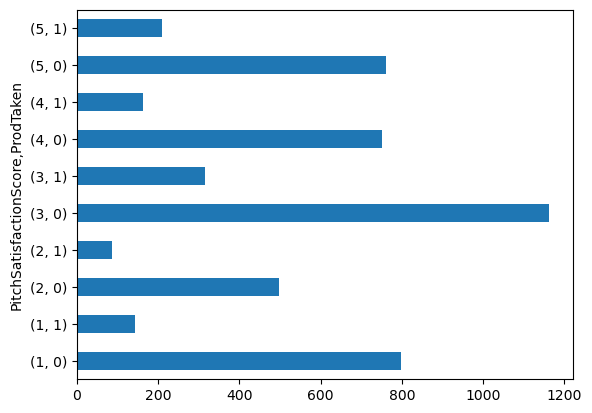

In [52]:
print(data.groupby(['PitchSatisfactionScore'])['ProdTaken'].value_counts().plot(kind="barh"))

Axes(0.125,0.11;0.775x0.77)


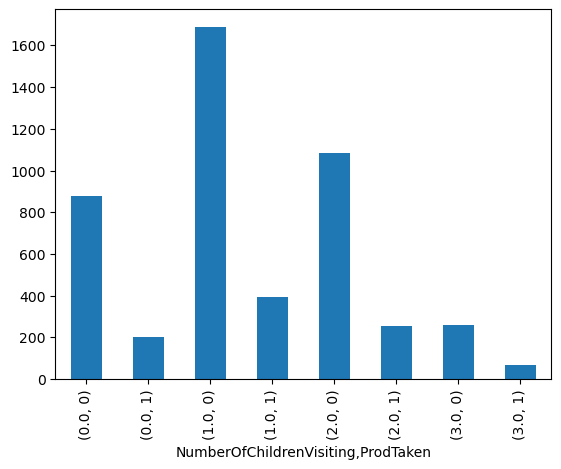

In [53]:
print(data.groupby(['NumberOfChildrenVisiting'])['ProdTaken'].value_counts().plot(kind='bar'))

In [57]:
gender =pd.pivot_table(data, columns='ProductPitched',index='Gender', aggfunc='size',fill_value =0)


In [59]:
print(gender)

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe
Gender                                                     
Fe Male             4      83     0        63             5
Female            676     641    82       263           155
Male             1162    1008   148       416           182


Axes(0.125,0.11;0.775x0.77)


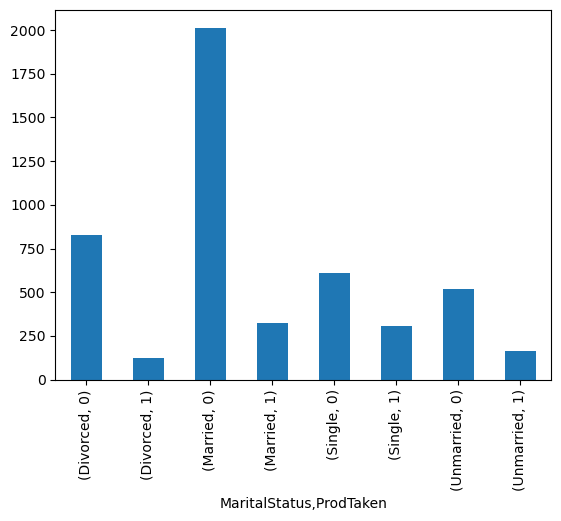

In [157]:
print(data.groupby(['MaritalStatus'])['ProdTaken'].value_counts().plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


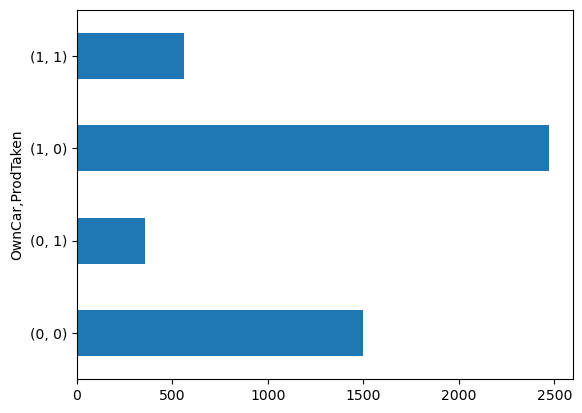

In [158]:
print(data.groupby(['OwnCar'])['ProdTaken'].value_counts().plot(kind="barh"))

Axes(0.125,0.11;0.775x0.77)


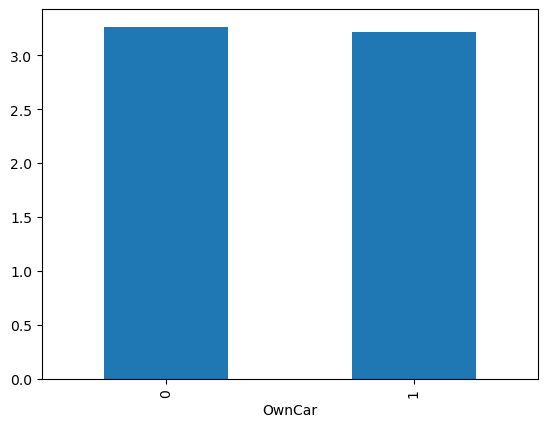

In [161]:
print(data.groupby(['OwnCar'])['NumberOfTrips'].mean().plot(kind="bar"))

In [163]:
print(data.groupby(['ProdTaken'])['MonthlyIncome'].value_counts())

ProdTaken  MonthlyIncome
0          20855.0          7
           22130.0          6
           18452.0          6
           21020.0          6
           17342.0          6
                           ..
1          25306.0          1
           25301.0          1
           21553.0          1
           25231.0          1
           25854.0          1
Name: count, Length: 2694, dtype: int64
